Họ tên: Nguyễn Thành Trung

MSSV: 20127654

# HW1: Giới thiệu CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [1]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

## Câu 1

In [2]:
!nvidia-smi

Sat Oct 28 12:20:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W /  70W |    103MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!apt-get update
!apt-get --yes --allow-unauthenticated install nvidia-driver-510
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
!mv cuda-ubuntu2004.pin /etc/apt/preferences.d/cuda-repository-pin-600
!apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/7fa2af80.pub
!add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/ /"
!apt-get update
!apt-get --yes install cuda

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [44.8 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,009 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,274 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,131 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,400 kB]
Hit:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadco

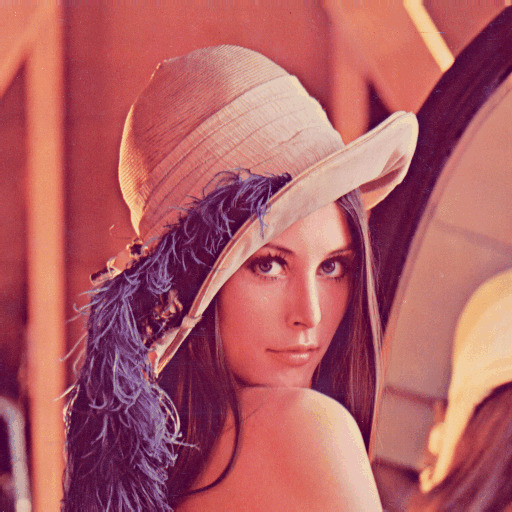

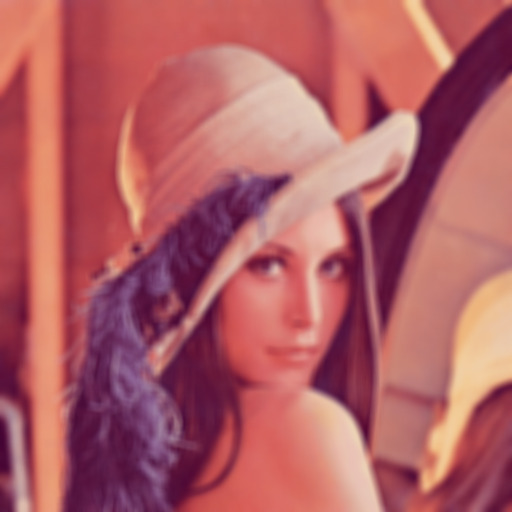

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/in.jpg')
cv2_imshow(img)
img2 = cv2.imread('/content/out2_target.jpg')
cv2_imshow(img2)

In [12]:
!nvcc -o HW1_P1 /content/HW1_P1.cu
!./HW1_P1 in.pnm out2_target.pnm

Image size (width x height): 512 x 512

Processing time (use host): 1.820000 ms

outPixels[0] 158
outPixels[1] 158
outPixels[2] 162
outPixels[3] 158
outPixels[4] 158
outPixels[5] 152
outPixels[6] 158
outPixels[7] 158
outPixels[8] 162
outPixels[9] 158
GPU name: Tesla T4
GPU compute capability: 7.5
outPixels_after[0] 158
outPixels_after[1] 158
outPixels_after[2] 162
outPixels_after[3] 158
outPixels_after[4] 158
outPixels_after[5] 152
outPixels_after[6] 158
outPixels_after[7] 158
outPixels_after[8] 162
outPixels_after[9] 158
outPixels_after[10] 158
outPixels_after[11] 158
outPixels_after[12] 149
outPixels_after[13] 158
outPixels_after[14] 158
outPixels_after[15] 150
outPixels_after[16] 150
outPixels_after[17] 150
outPixels_after[18] 158
outPixels_after[19] 160
outPixels_after[20] 149
outPixels_after[21] 155
outPixels_after[22] 148
outPixels_after[23] 150
outPixels_after[24] 148
outPixels_after[25] 150
outPixels_after[26] 149
outPixels_after[27] 148
outPixels_after[28] 150
outPixels_after[

In [14]:
!./HW1_P1 in.pnm out2_target16x16.pnm 16 16

Image size (width x height): 512 x 512

Processing time (use host): 4.762656 ms

outPixels[0] 158
outPixels[1] 158
outPixels[2] 162
outPixels[3] 158
outPixels[4] 158
outPixels[5] 152
outPixels[6] 158
outPixels[7] 158
outPixels[8] 162
outPixels[9] 158
GPU name: Tesla T4
GPU compute capability: 7.5
outPixels_after[0] 158
outPixels_after[1] 158
outPixels_after[2] 162
outPixels_after[3] 158
outPixels_after[4] 158
outPixels_after[5] 152
outPixels_after[6] 158
outPixels_after[7] 158
outPixels_after[8] 162
outPixels_after[9] 158
outPixels_after[10] 158
outPixels_after[11] 158
outPixels_after[12] 149
outPixels_after[13] 158
outPixels_after[14] 158
outPixels_after[15] 150
outPixels_after[16] 150
outPixels_after[17] 150
outPixels_after[18] 158
outPixels_after[19] 160
outPixels_after[20] 149
outPixels_after[21] 155
outPixels_after[22] 148
outPixels_after[23] 150
outPixels_after[24] 148
outPixels_after[25] 150
outPixels_after[26] 149
outPixels_after[27] 148
outPixels_after[28] 150
outPixels_after[

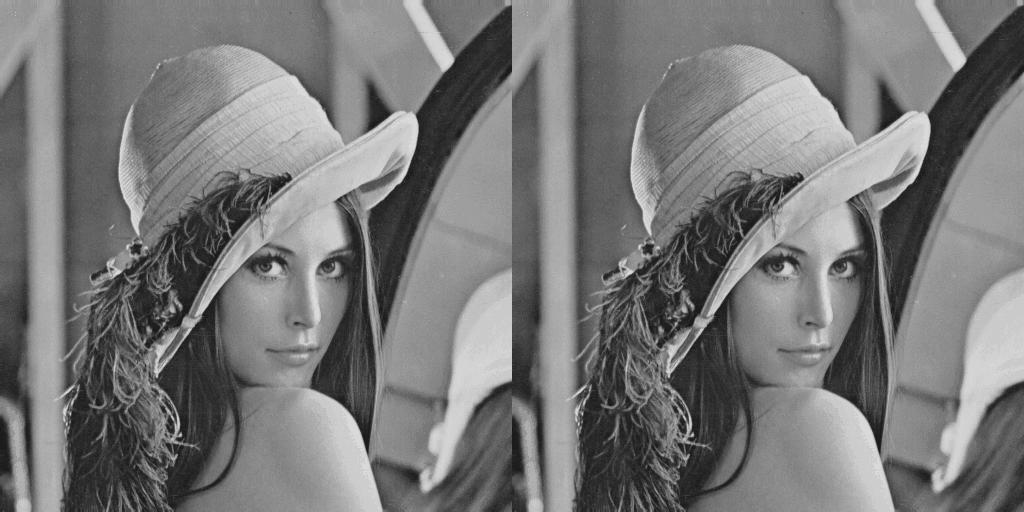

In [13]:
from IPython.display import display, Image

# Load the images
host_image = cv2.imread("/content/out2_target_host.pnm", cv2.IMREAD_GRAYSCALE)
device_image = cv2.imread("/content/out2_target_device.pnm", cv2.IMREAD_GRAYSCALE)

# Display the images side by side
comparison_image = cv2.hconcat([host_image, device_image])
cv2.imwrite("/content/comparison.png", comparison_image)

# Display the comparison image
display(Image(filename="/content/comparison.png"))


## Câu 2

In [37]:
!nvcc -arch=sm_{major}{minor} HW1_P2.cu -o HW1_P2
!./HW1_P2 in.pnm out2.pnm out2_target.pnm

Image size (width x height): 512 x 512

Processing time (use host): 245.477341 ms
Error: 0.000000

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time (use device): 1.828160 ms
Error: 0.000703



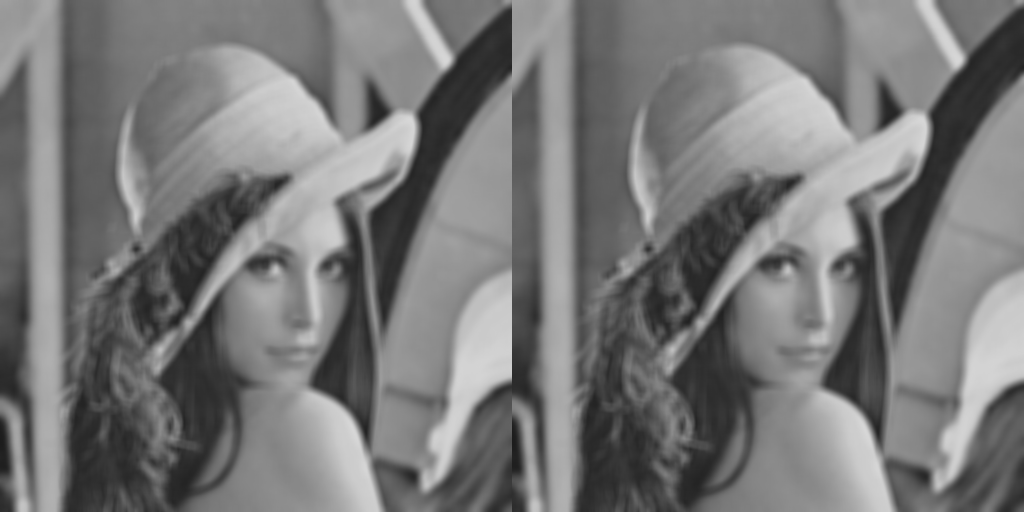

In [34]:
from IPython.display import display, Image

# Load the images
host_image = cv2.imread("/content/out2_2_host.pnm", cv2.IMREAD_GRAYSCALE)
device_image = cv2.imread("/content/out2_2_device.pnm", cv2.IMREAD_GRAYSCALE)

# Display the images side by side
comparison_image = cv2.hconcat([host_image, device_image])
cv2.imwrite("/content/comparison_2.png", comparison_image)

# Display the comparison image
display(Image(filename="/content/comparison_2.png"))
